# Two-Dimensional Moment Frame Analysis

This is a complete example of frame analysis. Although it is a 2D case, it can be applied to more complex models. While it demonstrates linear elastic analysis, it is also applicable to nonlinear elastoplastic analysis.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import openseespy.opensees as ops

import opstool as opst
import opstool.vis.pyvista as opsvis

## Create the model

![](frame_demo.png)

In [2]:
def FEModel():
    ops.wipe()
    ops.model("basic", "-ndm", 2, "-ndf", 3)

    # %% Defining Nodes

    ops.node(1, 0.000000e00, 0.000000e00)
    ops.node(2, 3.600000e02, 0.000000e00)
    ops.node(3, 7.200000e02, 0.000000e00)
    ops.node(4, 0.000000e00, 1.620000e02)
    ops.node(5, 3.600000e02, 1.620000e02)
    ops.node(6, 7.200000e02, 1.620000e02)
    ops.node(7, 0.000000e00, 3.240000e02)
    ops.node(8, 3.600000e02, 3.240000e02)
    ops.node(9, 7.200000e02, 3.240000e02)
    ops.node(10, 0.000000e00, 4.800000e02)
    ops.node(11, 3.600000e02, 4.800000e02)
    ops.node(12, 7.200000e02, 4.800000e02)
    ops.node(13, 0.000000e00, 6.360000e02)
    ops.node(14, 3.600000e02, 6.360000e02)
    ops.node(15, 7.200000e02, 6.360000e02)
    ops.node(16, 0.000000e00, 7.920000e02)
    ops.node(17, 3.600000e02, 7.920000e02)
    ops.node(18, 7.200000e02, 7.920000e02)
    ops.node(19, 0.000000e00, 9.480000e02)
    ops.node(20, 3.600000e02, 9.480000e02)
    ops.node(21, 7.200000e02, 9.480000e02)
    ops.node(22, 0.000000e00, 1.104000e03)
    ops.node(23, 3.600000e02, 1.104000e03)
    ops.node(24, 7.200000e02, 1.104000e03)

    # %% write node restraint

    ops.fix(1, 1, 1, 1)
    ops.fix(2, 1, 1, 1)
    ops.fix(3, 1, 1, 1)

    # %% Define the rigidDiaphragm
    ops.rigidDiaphragm(1, 5, 4, 6)
    ops.rigidDiaphragm(1, 8, 7, 9)
    ops.rigidDiaphragm(1, 11, 10, 12)
    ops.rigidDiaphragm(1, 14, 13, 15)
    ops.rigidDiaphragm(1, 17, 16, 18)
    ops.rigidDiaphragm(1, 20, 19, 21)
    ops.rigidDiaphragm(1, 23, 22, 24)

    # %% Defining Frame Elements

    ops.geomTransf("Linear", 1)
    ops.element("elasticBeamColumn", 1, 1, 4, 7.230000e01, 2.950000e04, 3.230000e03, 1)
    ops.element("elasticBeamColumn", 2, 4, 7, 7.230000e01, 2.950000e04, 3.230000e03, 1)
    ops.element("elasticBeamColumn", 3, 7, 10, 7.230000e01, 2.950000e04, 3.230000e03, 1)
    ops.element("elasticBeamColumn", 4, 10, 13, 6.210000e01, 2.950000e04, 2.670000e03, 1)
    ops.element("elasticBeamColumn", 5, 13, 16, 6.210000e01, 2.950000e04, 2.670000e03, 1)
    ops.element("elasticBeamColumn", 6, 16, 19, 5.170000e01, 2.950000e04, 2.150000e03, 1)
    ops.element("elasticBeamColumn", 7, 19, 22, 5.170000e01, 2.950000e04, 2.150000e03, 1)
    ops.element("elasticBeamColumn", 8, 2, 5, 8.440000e01, 2.950000e04, 3.910000e03, 1)
    ops.element("elasticBeamColumn", 9, 5, 8, 8.440000e01, 2.950000e04, 3.910000e03, 1)
    ops.element("elasticBeamColumn", 10, 8, 11, 8.440000e01, 2.950000e04, 3.910000e03, 1)
    ops.element("elasticBeamColumn", 11, 11, 14, 7.230000e01, 2.950000e04, 3.230000e03, 1)
    ops.element("elasticBeamColumn", 12, 14, 17, 7.230000e01, 2.950000e04, 3.230000e03, 1)
    ops.element("elasticBeamColumn", 13, 17, 20, 6.210000e01, 2.950000e04, 2.670000e03, 1)
    ops.element("elasticBeamColumn", 14, 20, 23, 6.210000e01, 2.950000e04, 2.670000e03, 1)
    ops.element("elasticBeamColumn", 15, 3, 6, 7.230000e01, 2.950000e04, 3.230000e03, 1)
    ops.element("elasticBeamColumn", 16, 6, 9, 7.230000e01, 2.950000e04, 3.230000e03, 1)
    ops.element("elasticBeamColumn", 17, 9, 12, 7.230000e01, 2.950000e04, 3.230000e03, 1)
    ops.element("elasticBeamColumn", 18, 12, 15, 6.210000e01, 2.950000e04, 2.670000e03, 1)
    ops.element("elasticBeamColumn", 19, 15, 18, 6.210000e01, 2.950000e04, 2.670000e03, 1)
    ops.element("elasticBeamColumn", 20, 18, 21, 5.170000e01, 2.950000e04, 2.150000e03, 1)
    ops.element("elasticBeamColumn", 21, 21, 24, 5.170000e01, 2.950000e04, 2.150000e03, 1)
    ops.element("elasticBeamColumn", 22, 4, 5, 4.710000e01, 2.950000e04, 5.120000e03, 1)
    ops.element("elasticBeamColumn", 23, 7, 8, 4.710000e01, 2.950000e04, 5.120000e03, 1)
    ops.element("elasticBeamColumn", 24, 10, 11, 3.830000e01, 2.950000e04, 4.020000e03, 1)
    ops.element("elasticBeamColumn", 25, 13, 14, 3.830000e01, 2.950000e04, 4.020000e03, 1)
    ops.element("elasticBeamColumn", 26, 16, 17, 3.250000e01, 2.950000e04, 3.330000e03, 1)
    ops.element("elasticBeamColumn", 27, 19, 20, 3.250000e01, 2.950000e04, 3.330000e03, 1)
    ops.element("elasticBeamColumn", 28, 22, 23, 3.250000e01, 2.950000e04, 3.330000e03, 1)
    ops.element("elasticBeamColumn", 29, 5, 6, 4.710000e01, 2.950000e04, 5.120000e03, 1)
    ops.element("elasticBeamColumn", 30, 8, 9, 4.710000e01, 2.950000e04, 5.120000e03, 1)
    ops.element("elasticBeamColumn", 31, 11, 12, 3.830000e01, 2.950000e04, 4.020000e03, 1)
    ops.element("elasticBeamColumn", 32, 14, 15, 3.830000e01, 2.950000e04, 4.020000e03, 1)
    ops.element("elasticBeamColumn", 33, 17, 18, 3.250000e01, 2.950000e04, 3.330000e03, 1)
    ops.element("elasticBeamColumn", 34, 20, 21, 3.250000e01, 2.950000e04, 3.330000e03, 1)
    ops.element("elasticBeamColumn", 35, 23, 24, 3.250000e01, 2.950000e04, 3.330000e03, 1)

    # %% Define the mass
    ops.mass(5, 0.49, 0.0, 0.0)
    ops.mass(8, 0.49, 0.0, 0.0)
    ops.mass(11, 0.49, 0.0, 0.0)
    ops.mass(14, 0.49, 0.0, 0.0)
    ops.mass(17, 0.49, 0.0, 0.0)
    ops.mass(20, 0.49, 0.0, 0.0)
    ops.mass(23, 0.49, 0.0, 0.0)

Let's first visualize the geometry:

In actual use, you can set ``notebook=False``, and ``fig.show()``. 
`notebook` and `jupyter_backend="jupyterlab"` are used here just for the convenience of presentation documents (static images).

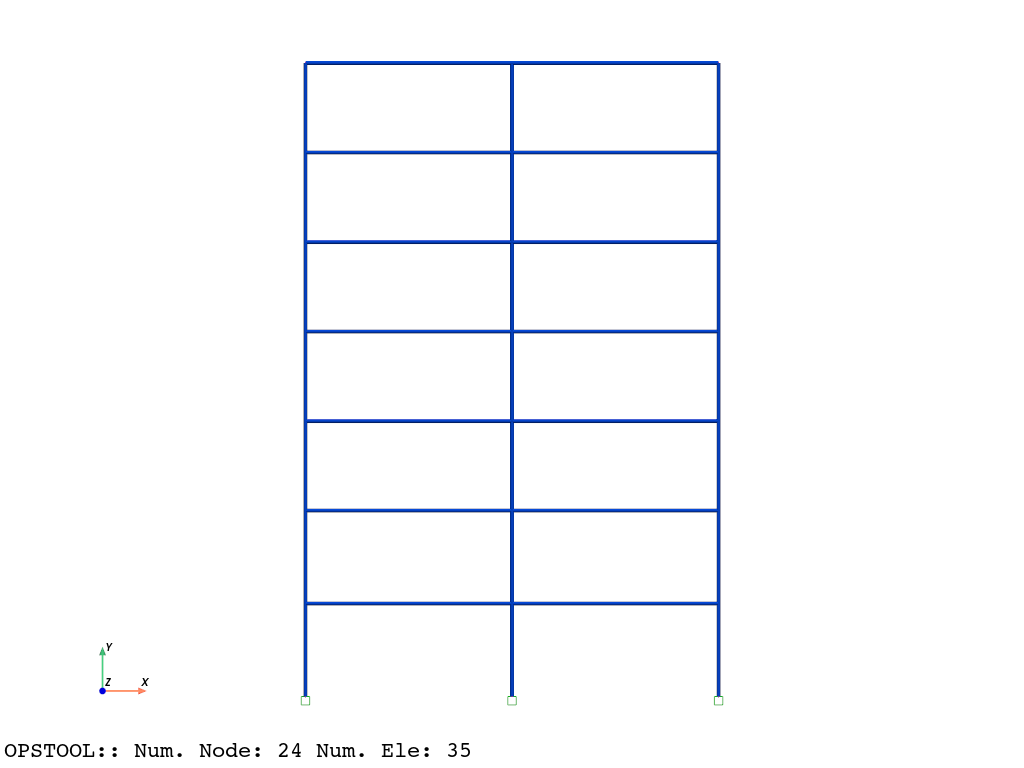

In [3]:
FEModel()
# If you work on notebook, you can use the following code to visualize the model
opsvis.set_plot_props(line_width=4, point_size=2, notebook=True)
opsvis.plot_model().show(jupyter_backend="jupyterlab")  # For static plot
# opsvis.plot_model().show()  # For interactive plot

# If you work on script, you can use the following code to visualize the model
# opsvis.set_plot_props(line_width=4, point_size=2)
# opsvis.plot_model().show()

You can also use the following code to visualize the model by using ``Plotly``:

In [4]:
opst.vis.plotly.set_plot_props(line_width=4, point_size=2)
fig = opst.vis.plotly.plot_model()
fig.write_html("model.html")
fig.show()

## Eigenvalue analysis

solver="-fullGenLapack" is intended to extract all seventh-order modes. This solver should be avoided in actual large models.

In [5]:
opst.post.save_eigen_data(odb_tag="eigen", mode_tag=6, solver="-fullGenLapack")
opsvis.set_plot_props(cmap="Spectral", line_width=4, point_size=5, font_size=12, notebook=True)

WARNING - the 'fullGenLapack' eigen solver is VERY SLOW. Consider using the default eigen solver.Using DomainModalProperties - Developed by: Massimo Petracca, Guido Camata, ASDEA Software Technology


OPSTOOL ::  Eigen data has been saved to .opstool.output/EigenData-eigen.nc!

OPSTOOL ::  Loading eigen data from .opstool.output/EigenData-eigen.nc ...

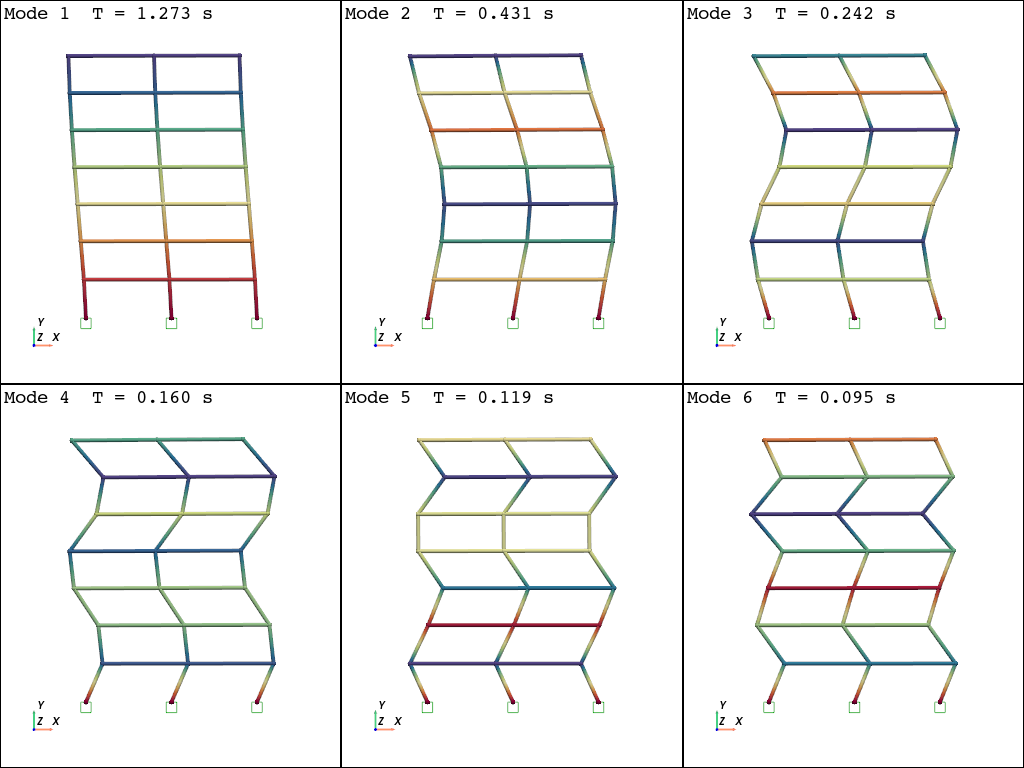

In [6]:
opsvis.plot_eigen(
    mode_tags=[1, 6],
    odb_tag="eigen",
    subplots=True,
    bc_scale=3,
).show(jupyter_backend="jupyterlab")

In [7]:
model_props, eigen_vectors = opst.post.get_eigen_data(odb_tag="eigen")
model_props_df = model_props.to_pandas()  # to pandas DataFrame
print("Modal period: ", model_props_df["eigenPeriod"])
print("Participation mass ratio: ", model_props_df["partiMassRatiosMX"])
print("Cumulative participation mass ratio: ", model_props_df["partiMassRatiosCumuMX"])

OPSTOOL ::  Loading eigen data from .opstool.output/EigenData-eigen.nc ...

Modal period:  modeTags
1    1.273211
2    0.431278
3    0.242043
4    0.160179
5    0.118990
6    0.095064
Name: eigenPeriod, dtype: float64
Participation mass ratio:  modeTags
1    79.962669
2    11.336182
3     4.180994
4     2.115029
5     1.414555
6     0.679967
Name: partiMassRatiosMX, dtype: float64
Cumulative participation mass ratio:  modeTags
1    79.962669
2    91.298850
3    95.479845
4    97.594874
5    99.009429
6    99.689396
Name: partiMassRatiosCumuMX, dtype: float64


## Static analysis

Defining Lateral Distributed Loads:

In [8]:
FEModel()
# %% Define the load pattern
ops.timeSeries("Linear", 1)
ops.pattern("Plain", 1, 1)
ops.load(4, 2.5, 0.0, 0.0)
ops.load(7, 5.0, 0.0, 0.0)
ops.load(10, 7.5, 0.0, 0.0)
ops.load(13, 10.0, 0.0, 0.0)
ops.load(16, 12.5, 0.0, 0.0)
ops.load(19, 15.0, 0.0, 0.0)
ops.load(22, 20.0, 0.0, 0.0)

Re-examine the model:

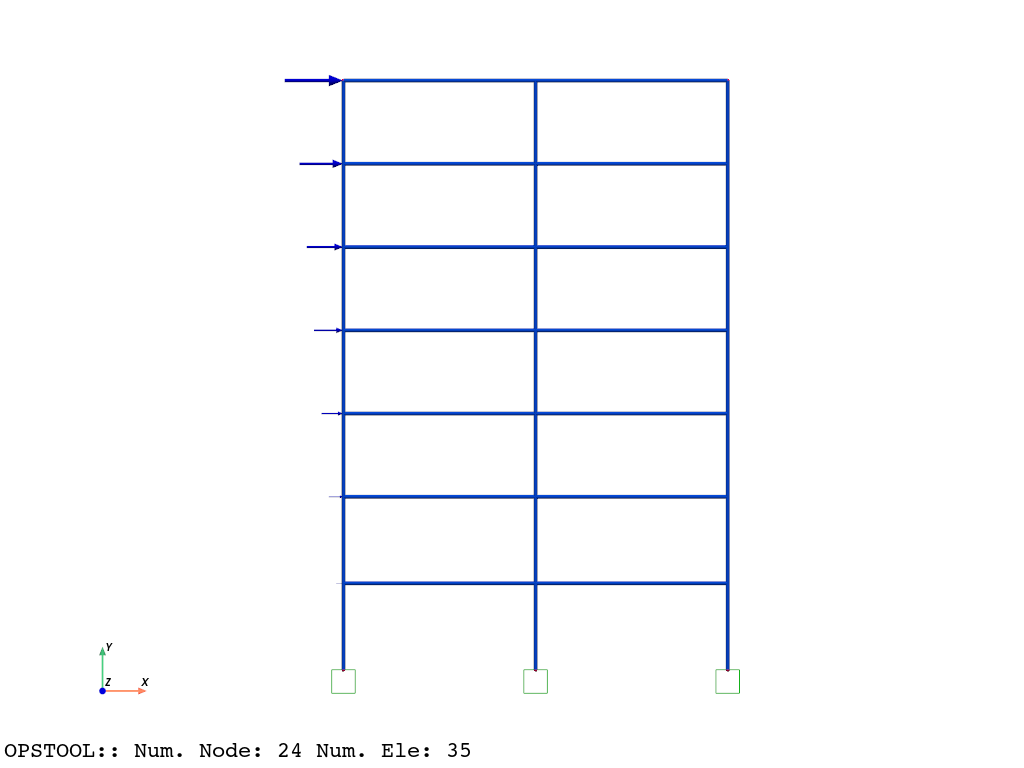

In [9]:
opsvis.set_plot_props(line_width=4, point_size=4, font_size=12, notebook=True)  # notebook=False for practical use
fig = opsvis.plot_model(show_nodal_loads=True, load_scale=2, bc_scale=3)
fig.show(jupyter_backend="jupyterlab")  # fig.show() for practical use

To perform the analysis:

In [10]:
n_steps = 10
ops.system("BandGeneral")
ops.constraints("Transformation")
ops.numberer("RCM")
ops.test("NormDispIncr", 1.0e-12, 10, 3)
ops.algorithm("Linear")
ops.integrator("LoadControl", 1 / n_steps)
ops.analysis("Static")

Save data:

In [11]:
odb = opst.post.CreateODB(odb_tag="static")
for i in range(n_steps):
    ops.analyze(1)  # one step of analysis
    odb.fetch_response_step()  # fetch the response on the current step
odb.save_response()

OPSTOOL ::  All responses data with _odb_tag = static saved in .opstool.output/RespStepData-static.nc!

Retrieve the nodal displacements:

In [12]:
node_resp = opst.post.get_nodal_responses(odb_tag="static")
print(
    "Node 22 displacement in x direction: ",
    node_resp["disp"].sel(nodeTags=22, DOFs="UX").data[-1],
)

OPSTOOL ::  Loading all response data from .opstool.output/RespStepData-static.nc ...

Node 22 displacement in x direction:  1.450757


Retrieve element response:

In [13]:
ele_resp = opst.post.get_element_responses(odb_tag="static", ele_type="Frame", resp_type="sectionForces")
print("M:", ele_resp.sel(eleTags=1, secDofs="MZ", secPoints=1).data[-1])
print("V:", ele_resp.sel(eleTags=1, secDofs="VY", secPoints=1).data[-1])
print("N:", ele_resp.sel(eleTags=1, secDofs="N", secPoints=1).data[-1])

OPSTOOL ::  Loading Frame sectionForces response data from .opstool.output/RespStepData-static.nc ...

M: -2324.6772
V: 20.672081
N: 69.98673


In [14]:
print(ele_resp)

<xarray.DataArray 'sectionForces' (time: 11, eleTags: 35, secPoints: 7,
                                   secDofs: 6)> Size: 65kB
array([[[[-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
         [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
         [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
         ...,
         [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
         [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
         [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]],

        [[-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          -0.00000000e+00, -0.00000000e+00, -0.0000000

Visualize node responses:

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-static.nc ...

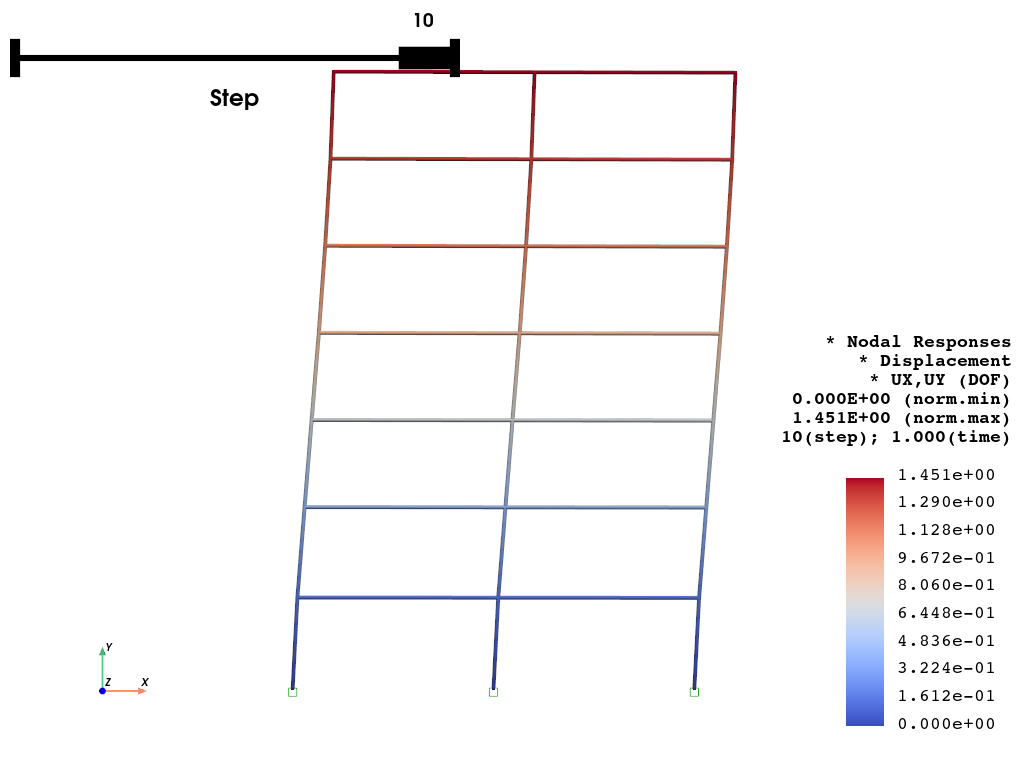

In [15]:
opsvis.set_plot_props(cmap="coolwarm", notebook=True, line_width=4, title_font_size=10)
opsvis.plot_nodal_responses(odb_tag="static", resp_type="disp", resp_dof=["UX", "UY"], slides=True, scale=2.0).show(
    jupyter_backend="jupyterlab"
)

Visualizing Element Response:

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-static.nc ...

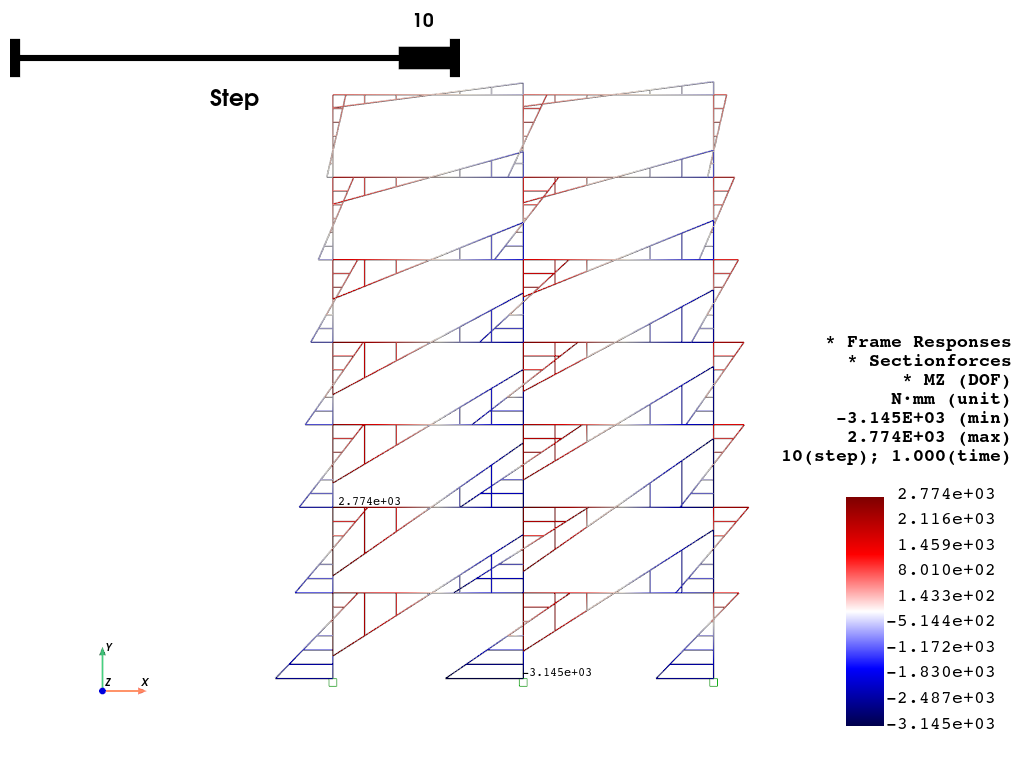

In [16]:
# Moment response
opsvis.set_plot_props(cmap="seismic", line_width=1, notebook=True, title_font_size=14)

opsvis.plot_frame_responses(
    odb_tag="static",
    resp_type="sectionForces",
    resp_dof="Mz",
    unit_symbol="N·mm",
    unit_factor=1.0,
    slides=True,
    scale=-2.0,
    style="wireframe",
).show(jupyter_backend="jupyterlab")

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-static.nc ...

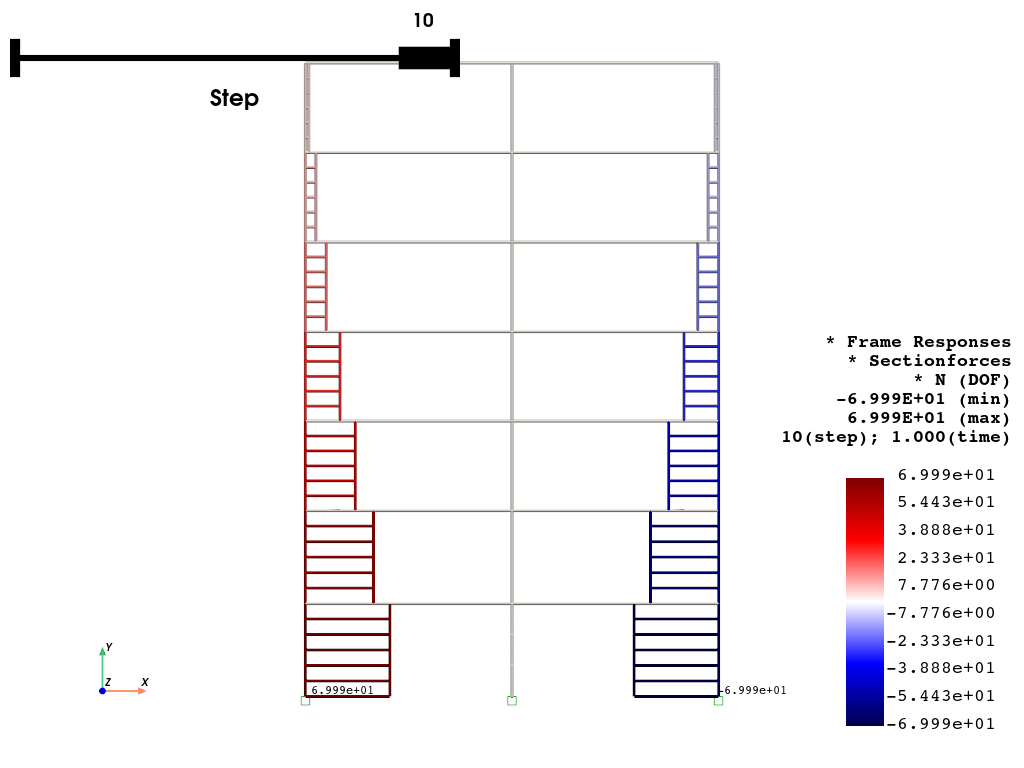

In [17]:
# Axial response
opsvis.plot_frame_responses(
    odb_tag="static",
    resp_type="sectionForces",
    resp_dof="N",
    slides=True,
    scale=-2.0,
    line_width=3,
    style="wireframe",
).show(jupyter_backend="jupyterlab")

## Seismic response analysis

### Load the ground motion data

All files can be downloaded here:
[click](https://github.com/yexiang1992/opstool/tree/master/docs/examples/post/Frame2D)

1560


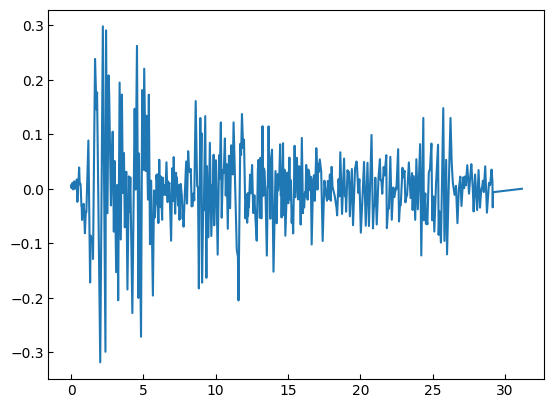

In [18]:
gmdata = np.loadtxt("ELCENTRO.txt")
time = gmdata[:, 0]
accel = gmdata[:, 1]
print(len(time))
plt.plot(time, accel)
plt.show()

### Create the ground motion load pattern

In [19]:
FEModel()
ops.timeSeries("Path", 2, "-time", *time, "-values", *accel, "-factor", 386.4)
ops.pattern("UniformExcitation", 2, 1, "-accel", 2)

### Create the Rayleigh damping

In [20]:
xDamp = 0.05
MpropSwitch = 1.0
KcurrSwitch = 0.0
KcommSwitch = 1.0
KinitSwitch = 0.0
nEigenI = 1  # mode 1
nEigenJ = 2  # mode 2
lambdaN = ops.eigen(nEigenJ)  # eigenvalue analysis for nEigenJ modes
lambdaI = lambdaN[nEigenI - 1]  # eigenvalue mode i
lambdaJ = lambdaN[nEigenJ - 1]  # eigenvalue mode j
omegaI = np.sqrt(lambdaI)
omegaJ = np.sqrt(lambdaJ)
# M-prop. damping; D = alphaM*M
alphaM = MpropSwitch * xDamp * (2 * omegaI * omegaJ) / (omegaI + omegaJ)
# current-K;      +beatKcurr*KCurrent
betaKcurr = KcurrSwitch * 2.0 * xDamp / (omegaI + omegaJ)
# last-committed K;   +betaKcomm*KlastCommitt
betaKcomm = KcommSwitch * 2.0 * xDamp / (omegaI + omegaJ)
betaKinit = KinitSwitch * 2.0 * xDamp / (omegaI + omegaJ)
ops.rayleigh(alphaM, 0.0, 0.0, betaKcomm)

### Perform analysis and save data

In [21]:
ops.wipeAnalysis()
ops.system("BandGeneral")
ops.constraints("Transformation")
ops.numberer("RCM")
ops.test("NormDispIncr", 1.0e-12, 10, 3)
ops.algorithm("Linear")
ops.integrator("HHT", 1.0, 0.5, 0.25)
ops.analysis("Transient")

In [22]:
n_steps, dt = 1600, 0.02
odb = opst.post.CreateODB(odb_tag="seismic")
for i in range(n_steps):
    ops.analyze(1, dt)
    odb.fetch_response_step()
odb.save_response(zlib=True)
# zlib=True to compress the data

OPSTOOL ::  All responses data with _odb_tag = seismic saved in .opstool.output/RespStepData-seismic.nc!

### Retrieve Node Responses

In [23]:
node_resp = opst.post.get_nodal_responses(odb_tag="seismic")
node_disp22 = node_resp["disp"].sel(nodeTags=22, DOFs="UX")
node_vel22 = node_resp["vel"].sel(nodeTags=22, DOFs="UX")
node_accel22 = node_resp["accel"].sel(nodeTags=22, DOFs="UX")

OPSTOOL ::  Loading all response data from .opstool.output/RespStepData-seismic.nc ...

Read the response result of SAP2000:

In [24]:
node_disp22sap = np.loadtxt("output-sap-nodedisp22.txt")
node_vel22sap = np.loadtxt("output-sap-nodevel22.txt")
node_accel22sap = np.loadtxt("output-sap-nodeaccel22.txt")

Draw a time series plot:

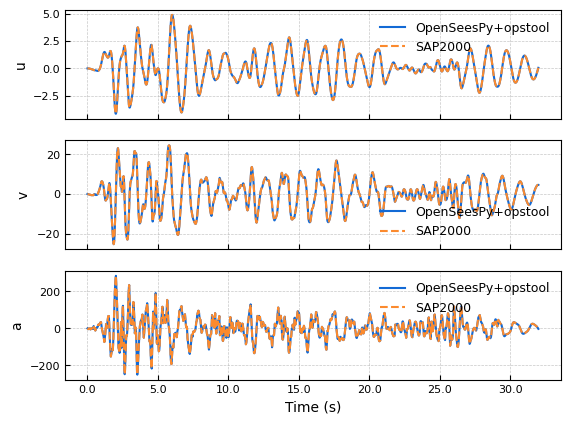

In [ ]:
fig, axes = plt.subplots(3, 1, sharex=True)
time = node_disp22.time

# Define colors and line styles
colors = ["#136ad5", "#fb8a2e"]  # Use neutral colors for publication standards
line_styles = ["-", "--"]  # Solid and dashed lines for differentiation

# Plot data with clear labels
axes[0].plot(
    time, node_disp22.data, label="OpenSeesPy+opstool", color=colors[0], linestyle=line_styles[0], linewidth=1.5
)
axes[0].plot(time, node_disp22sap, label="SAP2000", color=colors[1], linestyle=line_styles[1], linewidth=1.5)

axes[1].plot(
    time, node_vel22.data, label="OpenSeesPy+opstool", color=colors[0], linestyle=line_styles[0], linewidth=1.5
)
axes[1].plot(time, node_vel22sap, label="SAP2000", color=colors[1], linestyle=line_styles[1], linewidth=1.5)

axes[2].plot(
    time, node_accel22.data, label="OpenSeesPy+opstool", color=colors[0], linestyle=line_styles[0], linewidth=1.5
)
axes[2].plot(time, node_accel22sap, label="SAP2000", color=colors[1], linestyle=line_styles[1], linewidth=1.5)

# Set axis labels and title font sizes
axes[0].set_ylabel("u", fontsize=10)
axes[1].set_ylabel("v", fontsize=10)
axes[2].set_ylabel("a", fontsize=10)
axes[2].set_xlabel("Time (s)", fontsize=10)

# Customize each subplot
for ax in axes:
    ax.tick_params(axis="both", which="major", labelsize=8)  # Set tick font size
    ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)  # Add light grid lines
    ax.legend(fontsize=9, loc="best", frameon=False)  # Simple legend without box

# Format X-axis ticks to have consistent significant figures
for ax in axes:
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.2)  # Adjust vertical spacing
# Save figure in a publication-friendly format
# plt.savefig("fig-node22resp.pdf", bbox_inches="tight")
plt.show()

In [26]:
print("OpenSees Node 22 Disp Max:", node_disp22.data.max())
print("SAP2000 Node 22 Disp Max:", node_disp22sap.max())
print("OpenSees Node 22 Vel Max:", node_vel22.data.max())
print("SAP2000 Node 22 Vel Max:", node_vel22sap.max())
print("OpenSees Node 22 Accel Max:", node_accel22.data.max())
print("SAP2000 Node 22 Accel Max:", node_accel22sap.max())
print("-" * 50)
print("OpenSees Node 22 Disp Min:", node_disp22.data.min())
print("SAP2000 Node 22 Disp Min:", node_disp22sap.min())
print("OpenSees Node 22 Vel Min:", node_vel22.data.min())
print("SAP2000 Node 22 Vel Min:", node_vel22sap.min())
print("OpenSees Node 22 Accel Min:", node_accel22.data.min())
print("SAP2000 Node 22 Accel Min:", node_accel22sap.min())

OpenSees Node 22 Disp Max: 4.886218
SAP2000 Node 22 Disp Max: 4.886214
OpenSees Node 22 Vel Max: 24.562452
SAP2000 Node 22 Vel Max: 24.56
OpenSees Node 22 Accel Max: 284.1298
SAP2000 Node 22 Accel Max: 284.129
--------------------------------------------------
OpenSees Node 22 Disp Min: -4.141897
SAP2000 Node 22 Disp Min: -4.141893
OpenSees Node 22 Vel Min: -25.271881
SAP2000 Node 22 Vel Min: -25.27
OpenSees Node 22 Accel Min: -249.5041
SAP2000 Node 22 Accel Min: -249.502


### Retrieve Element Responses

In [27]:
ele_resp = opst.post.get_element_responses(odb_tag="seismic", ele_type="Frame", resp_type="sectionForces")
frame1Mz = -ele_resp.sel(eleTags=1, secDofs="MZ", secPoints=1)
frame1N = ele_resp.sel(eleTags=1, secDofs="N", secPoints=1)
frame1Vy = ele_resp.sel(eleTags=1, secDofs="VY", secPoints=1)

OPSTOOL ::  Loading Frame sectionForces response data from .opstool.output/RespStepData-seismic.nc ...

In [28]:
ele1respSAP = np.loadtxt("output-sap-frame1forces.txt")
frame1NSAP = ele1respSAP[:, 0]
frame1VySAP = ele1respSAP[:, 1]
frame1MzSAP = ele1respSAP[:, 5]

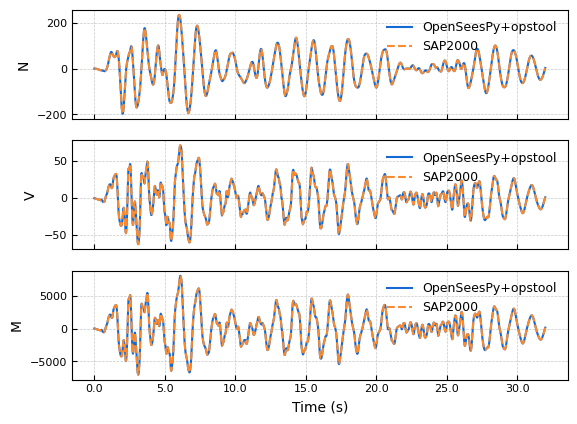

In [ ]:
fig, axes = plt.subplots(3, 1, sharex=True)
time = frame1Mz.time

# Define colors and line styles
colors = ["#136ad5", "#fb8a2e"]  # Use neutral colors for publication standards
line_styles = ["-", "--"]  # Solid and dashed lines for differentiation

# Plot data with clear labels
axes[0].plot(time, frame1N.data, label="OpenSeesPy+opstool", color=colors[0], linestyle=line_styles[0], linewidth=1.5)
axes[0].plot(time, frame1NSAP, label="SAP2000", color=colors[1], linestyle=line_styles[1], linewidth=1.5)

axes[1].plot(time, frame1Vy.data, label="OpenSeesPy+opstool", color=colors[0], linestyle=line_styles[0], linewidth=1.5)
axes[1].plot(time, frame1VySAP, label="SAP2000", color=colors[1], linestyle=line_styles[1], linewidth=1.5)

axes[2].plot(time, frame1Mz.data, label="OpenSeesPy+opstool", color=colors[0], linestyle=line_styles[0], linewidth=1.5)
axes[2].plot(time, frame1MzSAP, label="SAP2000", color=colors[1], linestyle=line_styles[1], linewidth=1.5)

# Set axis labels and title font sizes
axes[0].set_ylabel("N", fontsize=10)
axes[1].set_ylabel("V", fontsize=10)
axes[2].set_ylabel("M", fontsize=10)
axes[2].set_xlabel("Time (s)", fontsize=10)

# Customize each subplot
for ax in axes:
    ax.tick_params(axis="both", which="major", labelsize=8)  # Set tick font size
    ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)  # Add light grid lines
    ax.legend(fontsize=9, loc="best", frameon=False)  # Simple legend without box

# Format X-axis ticks to have consistent significant figures
for ax in axes:
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.2)  # Adjust vertical spacing
# Save figure in a publication-friendly format
# plt.savefig("fig-frame1-forces.pdf", bbox_inches="tight")
plt.show()

In [30]:
print("OpenSees Frame 1 N Max:", frame1N.data.max())
print("SAP2000 Frame 1 N Max:", frame1NSAP.max())
print("OpenSees Frame 1 Vy Max:", frame1Vy.data.max())
print("SAP2000 Frame 1 Vy Max:", frame1VySAP.max())
print("OpenSees Frame 1 Mz Max:", frame1Mz.data.max())
print("SAP2000 Frame 1 Mz Max:", frame1MzSAP.max())
print("-" * 50)
print("OpenSees Frame 1 N Min:", frame1N.data.min())
print("SAP2000 Frame 1 N Min:", frame1NSAP.min())
print("OpenSees Frame 1 Vy Min:", frame1Vy.data.min())
print("SAP2000 Frame 1 Vy Min:", frame1VySAP.min())
print("OpenSees Frame 1 Mz Min:", frame1Mz.data.min())
print("SAP2000 Frame 1 Mz Min:", frame1MzSAP.min())

OpenSees Frame 1 N Max: 233.99113
SAP2000 Frame 1 N Max: 233.991
OpenSees Frame 1 Vy Max: 71.202286
SAP2000 Frame 1 Vy Max: 71.202
OpenSees Frame 1 Mz Max: 8003.0625
SAP2000 Frame 1 Mz Max: 8003.05
--------------------------------------------------
OpenSees Frame 1 N Min: -196.78415
SAP2000 Frame 1 N Min: -196.784
OpenSees Frame 1 Vy Min: -61.886253
SAP2000 Frame 1 Vy Min: -61.886
OpenSees Frame 1 Mz Min: -6995.9204
SAP2000 Frame 1 Mz Min: -6995.889


### Creating an .MP4 animation

In [31]:
opsvis.set_plot_props(font_size=8, title_font_size=10, line_width=5, point_size=3)
opsvis.plot_nodal_responses_animation(
    odb_tag="seismic",
    resp_type="disp",
    resp_dof=["UX", "UY"],
    framerate=60,  # Frames per second
    savefig="NodalRespAnimation.mp4",
    scale=2.0,
).close()

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-seismic.nc ...

Animation has been saved to NodalRespAnimation.mp4!


In [32]:
from IPython.display import Video

Video("NodalRespAnimation.mp4", embed=True, width=640, height=360)